# Sales Data Analysis

Explanation:

In this project, you’ll work with a sales database to extract transaction data and perform an in-depth analysis of sales trends using Pandas. The objective is to gain insights into sales performance over time, identify top-performing products, and visualize the results for better decision-making.

In [1]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine

In [2]:
# Create connection with database 
engine = create_engine('sqlite:///sales_data.db')
conn = engine.connect()

In [15]:
# SQL query to extract transaction data
query = """
SELECT Invoice, StockCode, Description, InvoiceDate, Price , Quantity, 'Customer ID', Country
FROM transactions
WHERE InvoiceDate BETWEEN '2009-12-01 07:45:00.000000' AND '2010-12-01 07:45:00.000000'
"""
df_transactions = pd.read_sql(query, con=conn)
print(df_transactions.head())


  Invoice StockCode                          Description  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1  489434    79323P                   PINK CHERRY LIGHTS   
2  489434    79323W                  WHITE CHERRY LIGHTS   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE    
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

                  InvoiceDate  Price  Quantity 'Customer ID'         Country  
0  2009-12-01 07:45:00.000000   6.95        12   Customer ID  United Kingdom  
1  2009-12-01 07:45:00.000000   6.75        12   Customer ID  United Kingdom  
2  2009-12-01 07:45:00.000000   6.75        12   Customer ID  United Kingdom  
3  2009-12-01 07:45:00.000000   2.10        48   Customer ID  United Kingdom  
4  2009-12-01 07:45:00.000000   1.25        24   Customer ID  United Kingdom  


In [17]:
# Calculate total sales for each product 
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Price']
sales_summary = df_transactions.groupby('Invoice')['total_sales'].sum().reset_index()

# Sort by total sales
top_products = sales_summary.sort_values(by = 'total_sales', ascending=False).head(10)

print(top_products)

      Invoice  total_sales
21730  533027     49844.99
21034  531516     45332.97
2063   493819     44051.60
17340  524181     33167.80
18725  526934     26007.08
11724  512771     25111.09
13230  515944     22863.36
6798   503061     22853.77
14101  517731     21984.00
2900   495591     18570.88


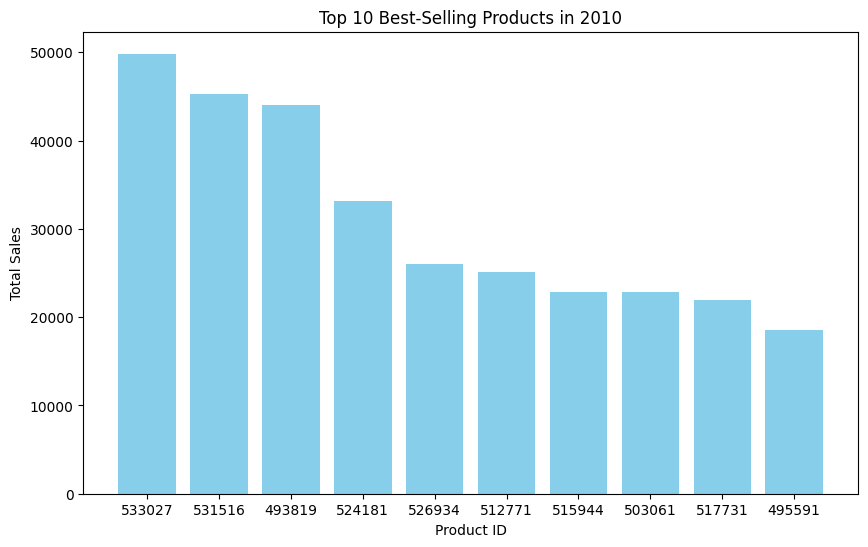

In [20]:
# Visualizing Sales Trends 
# plot the top 10 products by sales 

plt.figure(figsize = (10,6))
plt.bar(top_products['Invoice'], top_products['total_sales'], color = 'skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Products in 2010')
plt.show()